In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def generate_random_points():
    x = np.arange(100)
    delta = np.random.uniform(-10,10,size=(100,))
    y = .5 * x + 3 + delta
    return x,y

Text(0.5, 1.0, 'Graph of Y versus X')

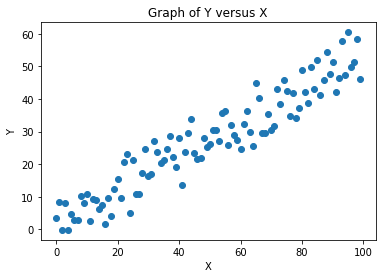

In [77]:
x,y = generate_random_points()
plt.plot(x,y,'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph of Y versus X')

<h4>These are the values that we want to find a line of best fit for.</h4>

In [46]:
def MSE(Y,Y_pred):
    """
    The loss function for evaluting our line of best fit
    """
    m = Y.shape[1]
    return np.sum(((Y - Y_pred) ** 2),axis=1) / (2*m)

In [80]:
x_ones = np.ones(100)
X = np.array([x_ones,x])#intercept parameter will just be times by 1 so that we can use matrix multiplication
Y = np.array([y])
theta = np.random.random((2,)) #Our starting parameters will just be random numbers that we want to optimize

The MSE is [46.79863854]


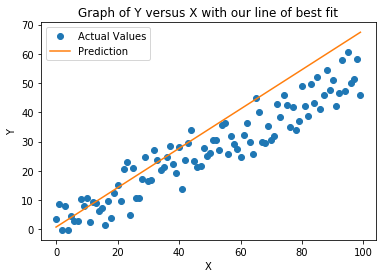

In [82]:
Y_pred = np.dot(theta,X)
print(f"The MSE is {MSE(Y,Y_pred)}")
plt.plot(x,y,'o',label='Actual Values')
plt.plot(X[1],Y_pred,label='Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph of Y versus X with our line of best fit')
plt.legend(loc='upper left')

<h4>As you can see our random line of best fit vaguely resembles a line of best fit for the data but it could be a lot better</h4>

In [59]:
def gradient_descent(X,Y,theta,alpha,iterations):
    """
    This function will update our values of theta using the gradient descent algorithm
    """
    theta = theta.astype("float64")
    theta = theta.reshape(1,2)
    m = Y.shape[1]
    loss_history = []
    Y_pred_history = np.array([])
    for iteration in range(iterations):
        Y_pred = np.dot(theta,X)
        Y_pred_history = np.append(Y_pred_history,Y_pred)
        error = Y_pred - Y
        loss = MSE(Y,Y_pred)
        loss_history.append(loss)
        gradients = np.dot(error,X.T) / m
        theta -= alpha*gradients 
        if iteration % 50 == 0:
            print(f"Iteration {iteration} : Cost {loss} : Theta {theta}")
    return theta,loss_history,Y_pred_history

In [60]:
new_theta,loss_history,Y_pred_history = gradient_descent(X,Y,theta,0.0006,1000)

Iteration 0 : Cost [16.18361661] : Theta [[0.38524188 0.52141058]]
Iteration 50 : Cost [14.91716972] : Theta [[0.40260313 0.54252301]]
Iteration 100 : Cost [14.84440058] : Theta [[0.41958528 0.54706139]]
Iteration 150 : Cost [14.83182726] : Theta [[0.43638313 0.54788357]]
Iteration 200 : Cost [14.8224173] : Theta [[0.45304116 0.54787365]]
Iteration 250 : Cost [14.81329911] : Theta [[0.46957008 0.54767856]]
Iteration 300 : Cost [14.80432622] : Theta [[0.48597303 0.5474434 ]]
Iteration 350 : Cost [14.79548927] : Theta [[0.50225145 0.5472007 ]]
Iteration 400 : Cost [14.78678585] : Theta [[0.51840641 0.54695775]]
Iteration 450 : Cost [14.77821393] : Theta [[0.53443885 0.54671617]]
Iteration 500 : Cost [14.76977152] : Theta [[0.55034972 0.54647632]]
Iteration 550 : Cost [14.76145666] : Theta [[0.56613994 0.54623827]]
Iteration 600 : Cost [14.75326743] : Theta [[0.58181041 0.54600201]]
Iteration 650 : Cost [14.74520192] : Theta [[0.59736206 0.54576755]]
Iteration 700 : Cost [14.73725828] : T

The Mean Squared Error of our best fit line is now [13.12542838]


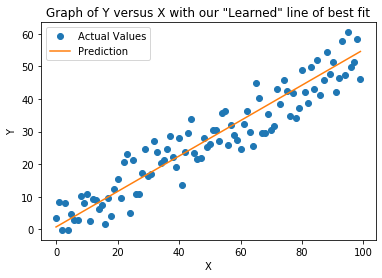

In [83]:
Y_pred = np.dot(new_theta,X).reshape(100,)
print(f"The Mean Squared Error of our best fit line is now {MSE(Y,Y_pred)}")
plt.plot(x,y,'o',label='Actual Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph of Y versus X with our "Learned" line of best fit')
plt.plot(X[1],Y_pred,label='Prediction')
plt.legend(loc='upper left')

<h4>As you can see the line of best more accurately describes the data now</h4>

Text(0.5, 1.0, 'Graph of Cost versus Iterations')

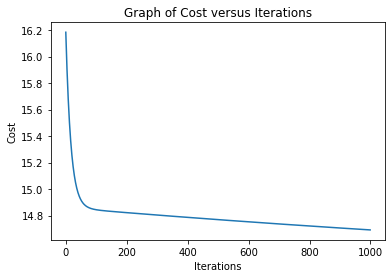

In [64]:
iterations = [i for i in range(1000)]
plt.plot(iterations,loss_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Graph of Cost versus Iterations')

<h4>The Mean Squared Error of our line of best fit decreases as the number of iterations increases, it starts of improving quickly then slows down towards the end. This is more clearly expressed in the gif at the bottom of the notebook</h4>

In [53]:
def find_coefficient(x,y):
    x_mean = x.mean()
    y_mean = y.mean()
    return sum((x - x_mean)*(y - y_mean)) / (sum((x - x_mean) ** 2))

def find_intercept(x,y,beta):
    y_mean = y.mean()
    x_mean = x.mean()
    return y_mean - beta * x_mean

In [66]:
beta = find_coefficient(x,y)
alpha = find_intercept(x,y,beta)
print(f"The actual Beta {beta} and Alpha {alpha}")
print()
print(f"Compared to our 'learned' values of Beta : {theta[1]} and Alpha : {theta[0]}")

The actual Beta 0.515082250357546 and Alpha 2.6326627090611545

Compared to our 'learned' values of Beta : 0.5773492153005995 and Alpha : 0.38574305413611787


In [68]:
Y_actual_pred = x*beta + alpha
Y_actual_loss = MSE(Y,Y_actual_pred)
print(f"The loss for our calculated coefficients is {Y_actual_loss}")
print(f"Compared with {MSE(Y,Y_pred)} for our 'learned' values")

The loss for our calculated coefficients is [14.21942964]
Compared with [14.69205423] for our 'learned' values


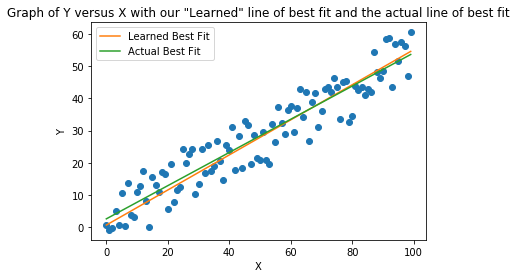

In [72]:
plt.plot(x,y,'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph of Y versus X with our "Learned" line of best fit and the actual line of best fit')
plt.plot(X[1],Y_pred,label='Learned Best Fit')
plt.plot(X[1],Y_actual_pred,label='Actual Best Fit')
plt.legend(loc='upper left')

<h4>You can see that the learned line of best fit is very similar to the actual line of best fit. If we had used more iterations then it would be even closer to the actual line.</h4>

<h1><center>What is actually happening?</center></h1>
<h4>If you plot the graph of Y versus X along with the line of best fit for each value of theta as they are being successively updated using gradient descent. It's more clear to see what is happening. The adjustments of the line of best fit get sucessively smaller, this is refelcted in the graph of Cost versus Iterations as the cost decreases rapidly at first then decreases as the number of iterations increase because smaller and smaller adjustments are being made.</h4>
<img src='regression-gif.gif' width="750" align="center">